In [1]:
import pandas as pd
import scipy.stats
import numpy as np
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import KNN
#from sklearn.neighbors import KNeighborsClassifier as KNNSK

sns.set_style("whitegrid")
%matplotlib inline
%matplotlib notebook

In [3]:
'''
#  Attribute                     Domain
   -- -----------------------------------------
   1. Sample code number            id number
   2. Clump Thickness               1 - 10
   3. Uniformity of Cell Size       1 - 10
   4. Uniformity of Cell Shape      1 - 10
   5. Marginal Adhesion             1 - 10
   6. Single Epithelial Cell Size   1 - 10
   7. Bare Nuclei                   1 - 10
   8. Bland Chromatin               1 - 10
   9. Normal Nucleoli               1 - 10
  10. Mitoses                       1 - 10
  11. Class:                        (2 for benign, 4 for malignant)
'''
descrip = {2:'Clump Thickness',
         3:'Uniformity of Cell Size',
         4:'Uniformity of Cell',
         5:'Marginal Adhesion',
         6:'Single Epithelial Cell Size',
         7:'Bare Nuclei',
         8:'Bland Chromatin',
         9:'Normal Nucleoli',
         10:'Mitoses',
         11:'Class'  
         }

columns = ['ID']

for i in descrip.keys():
    name = descrip[i].split()
    name = [j[0] for j in name]
    name = ''.join(name)
    columns.append(name.upper())

df = pd.read_csv('data/data.txt')
df.columns = columns

#drop the first columns, that is pacient ID
df.drop('ID', axis=1, inplace=True)

#refatoring the column label
df['C'] = df['C'].apply(lambda x: 1 if x == 2 else 0)

#shape of data
df.shape

(698, 10)

In [4]:
#finding the missing values and adding to a list the realative raws
cols = []
for i in range(len(df.BN)):
    try:
        float(df['BN'][i])
    except:
        cols.append(df.loc[i].tolist())
        df.drop(i, axis=0, inplace=True)
df.shape

(682, 10)

In [5]:
#converting the data frame to integers
df.BN = df.BN.astype('int64')
#check out
df.dtypes

CT      int64
UOCS    int64
UOC     int64
MA      int64
SECS    int64
BN      int64
BC      int64
NN      int64
M       int64
C       int64
dtype: object

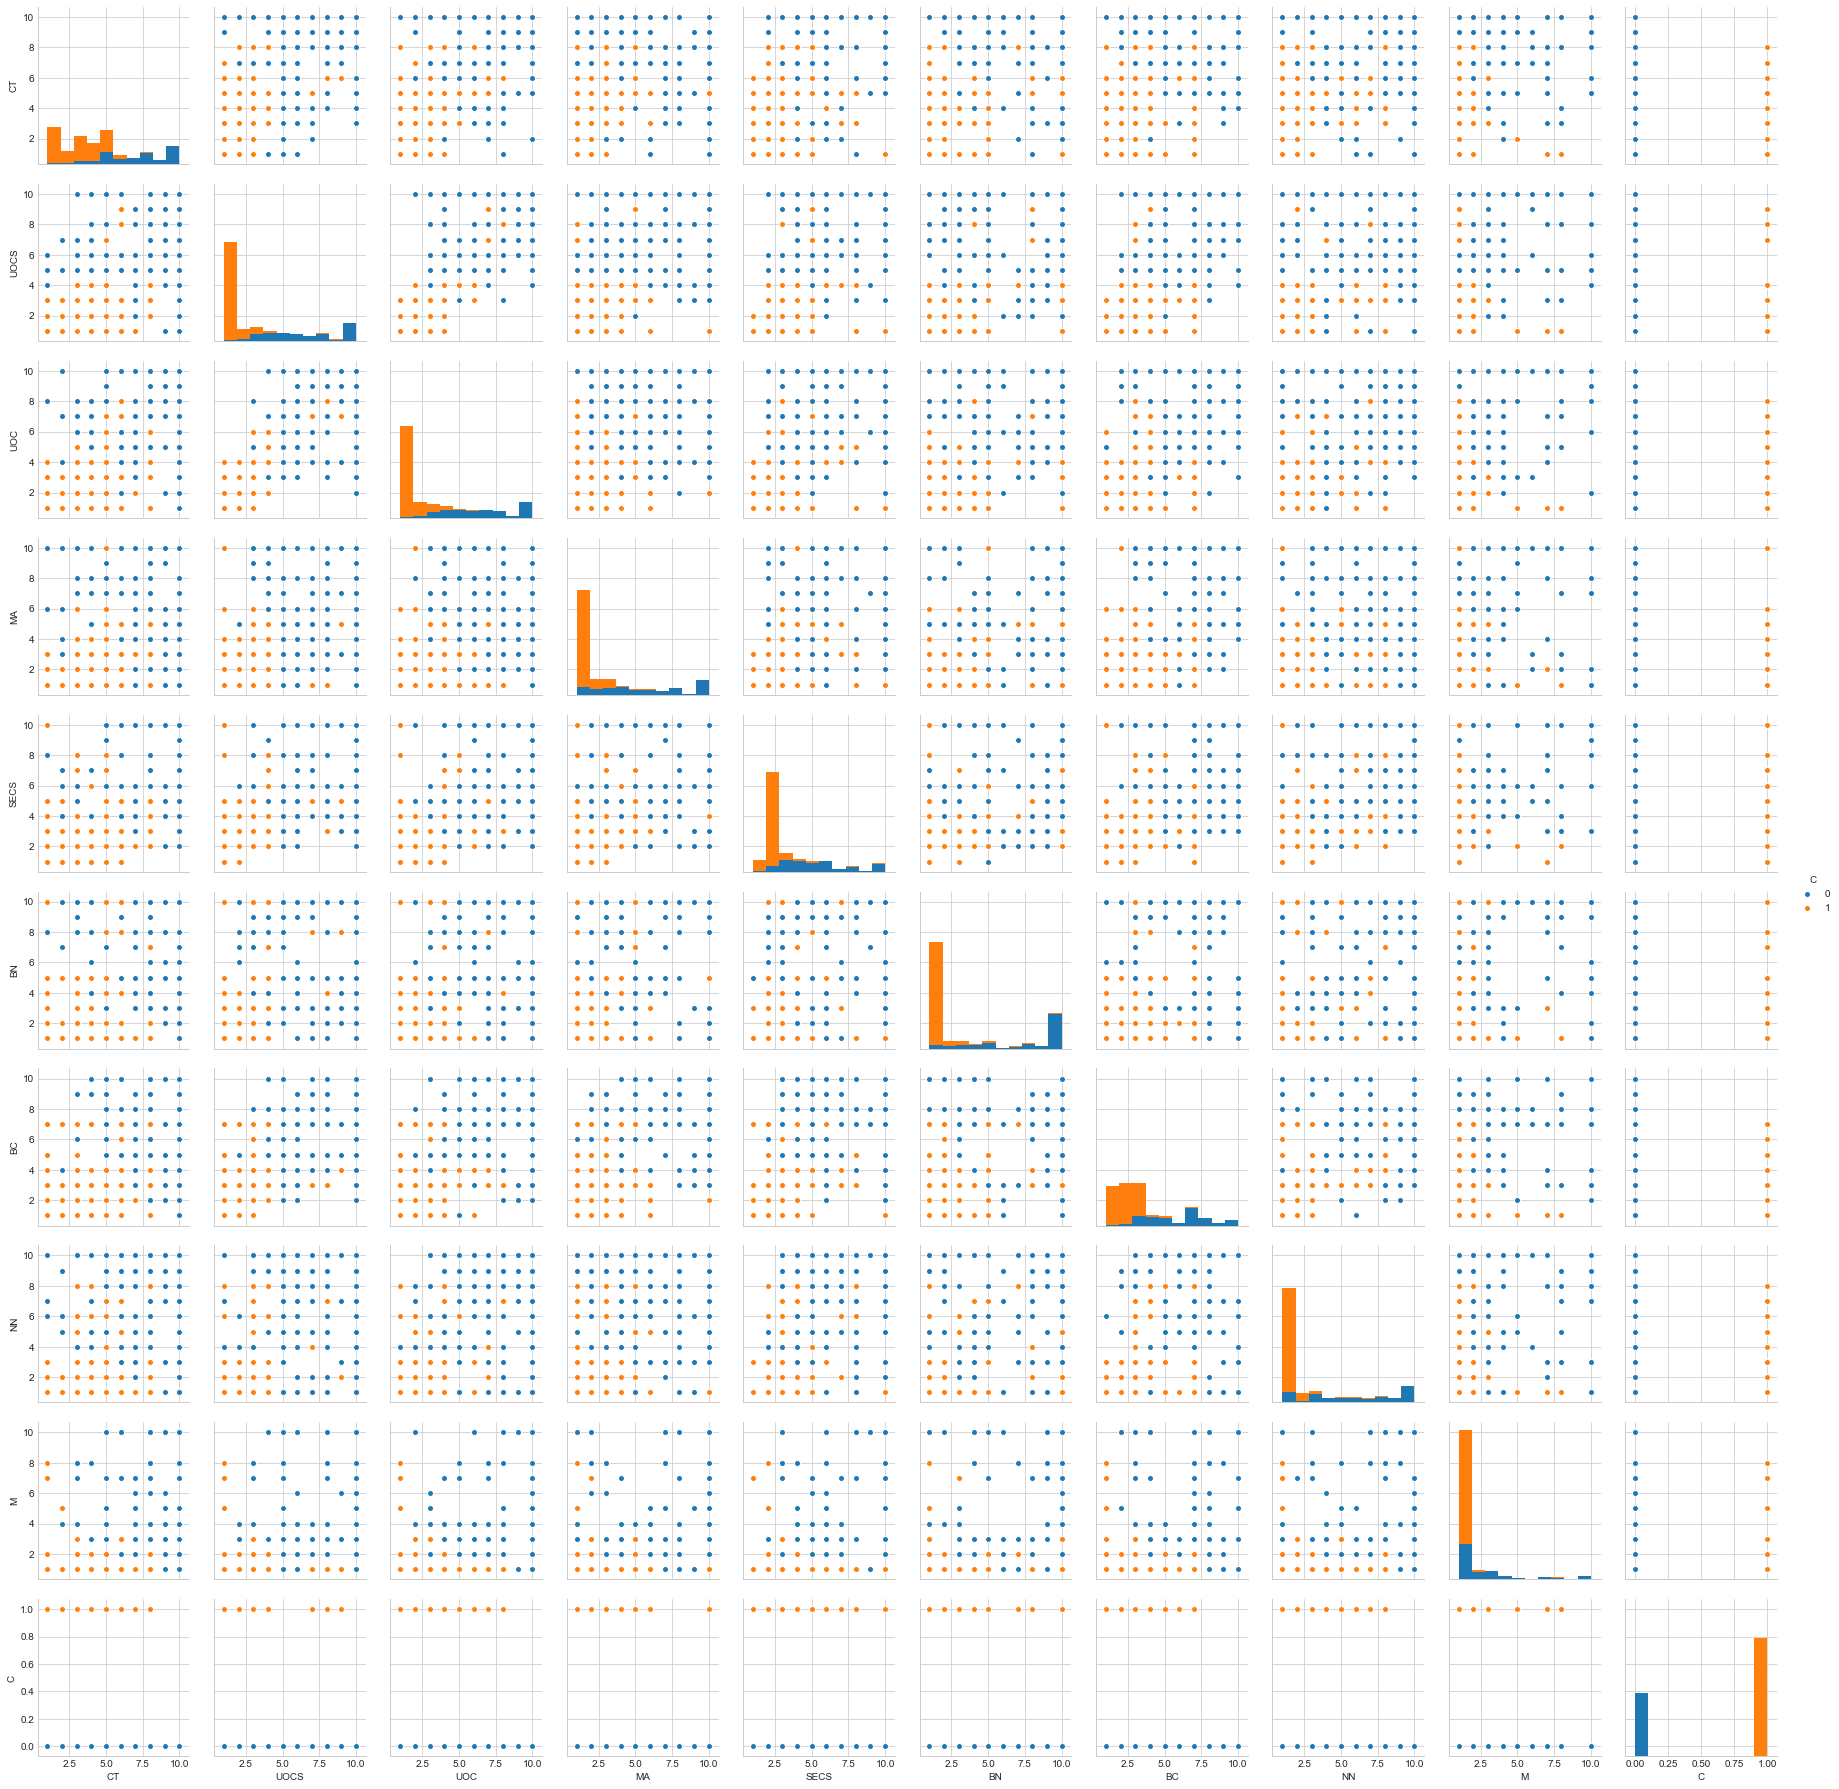

In [104]:
sns.pairplot(df,hue='C')

In [5]:
features = df[df.columns[:-1]]
labels = df['C']

Checking how much is the correlation between the attributes

<IPython.core.display.Javascript object>


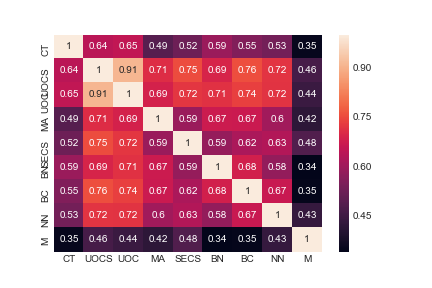

In [7]:
#plt.figure(figsize=(25,12))
sns.heatmap(features.corr(), annot=True)

According the correlations heatmap the CT,M,BN and BC attributes are the bests to divide data into classes, because the correlactions between them are the most closest of 0

<IPython.core.display.Javascript object>


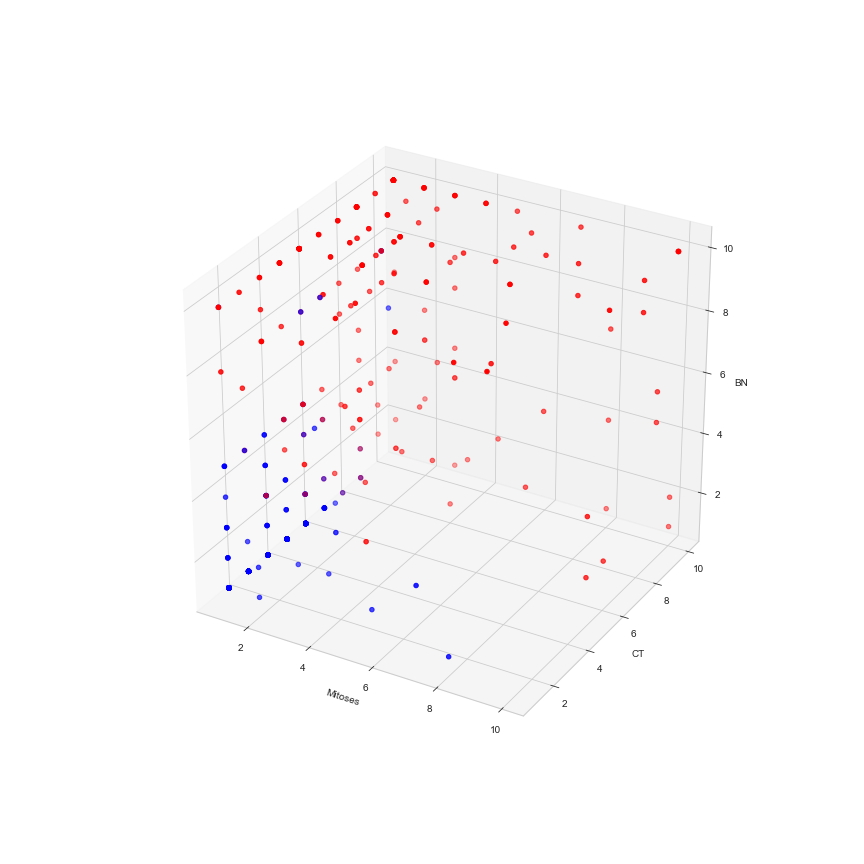

In [14]:
fig = plt.figure(figsize=(12,12))
# plt.size((12,12))
ax = fig.add_subplot(111, projection='3d')

features = df[['M','CT','BN','BC']]
labels = df['C']

x = features['M']
y = features['CT']
z = features['BN']

colormap = {0:'red',1:'blue'}
colors = [colormap[x] for x in labels]

# plt.scatter(x='BN',y='M',data=features, color=colors)

ax.scatter(x, y, z,color=colors)
ax.set_xlabel("Mitoses")
ax.set_ylabel("CT")
ax.set_zlabel("BN")
plt.show()

## Trainning without missing values

In [6]:
features = df[['M','CT','BN','BC','C']]

features = features.values.tolist()

perc = 0.9
features_train = features[:int(perc*682)]
features_test = features[int(perc*682):]


labels_train = [i[-1] for i in features_train]
labels_test = [i[-1] for i in features_test]

features_train = [i[:-1] for i in features_train]
features_test = [i[:-1] for i in features_test]

# features_train = features.sample(frac=0.9, random_state=22)
# features_test = features.sample(frac=0.1, random_state=22)

# labels_train = features_train['C']
# labels_test = features_test['C']

# features_train = features_train[features_train.columns[:-1]].values.tolist()
# features_test = features_test[features_test.columns[:-1]].values.tolist()

# labels_train = labels_train.tolist()
# labels_test = labels_test.tolist()

len(features_train), len(labels_train), len(features_test), len(labels_test)

(613, 613, 69, 69)

<IPython.core.display.Javascript object>


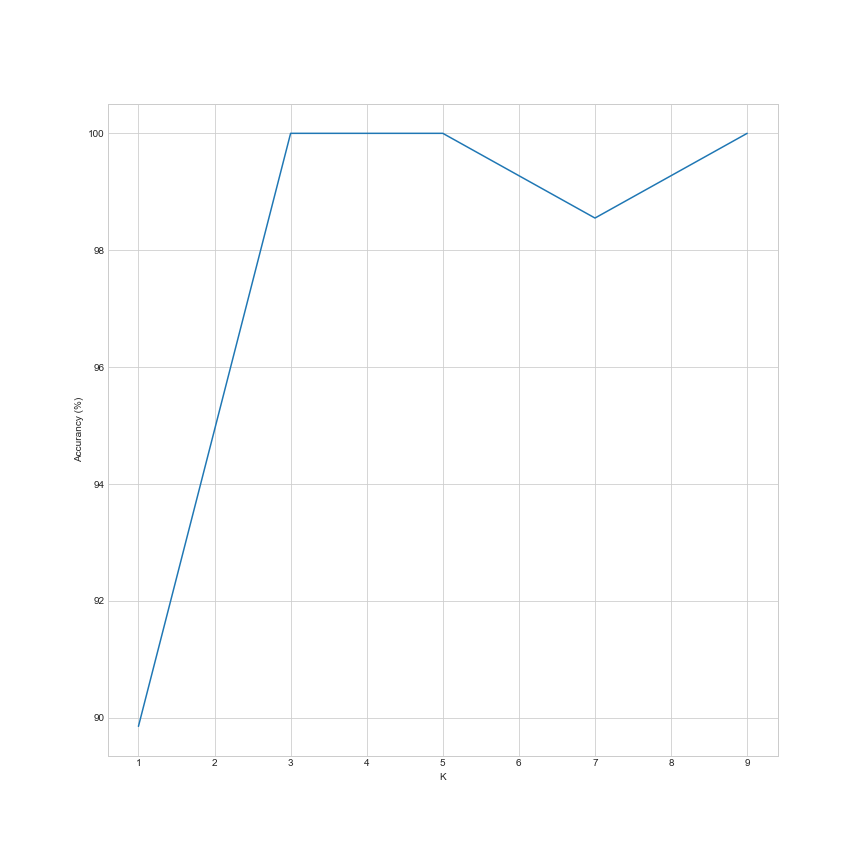

In [7]:
KNN.fit(features_train,labels_train)
scores = []
for i in range(1,10,2):
    predictions = KNN.predict(features_test,i)
    scores.append(KNN.score(predictions, labels_test))

plt.figure(figsize=(12,12))
plt.plot([1,3,5,7,9],scores)
# plt.xlim(None,10)
# plt.ylim(None,100)

plt.xlabel('K')
plt.ylabel('Accurancy (%)')
plt.show()

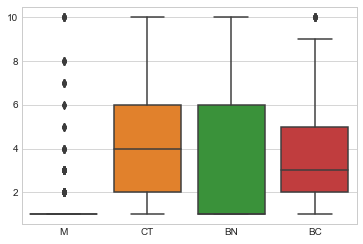

In [169]:
sns.boxplot(data=features)

In [43]:
threshold = features.M.quantile(.75)-features.M.quantile(.25)
lim_sup_M = features.M.quantile(.75)+(1.5*threshold)
lim_inf_M = features.M.quantile(.25)-(1.5*threshold)
len([i for i in features.M if i >lim_sup_M or i<lim_inf_M])

120

In [45]:
threshold = features.BC.quantile(.75)-features.BC.quantile(.25)
lim_sup_BC = features.BC.quantile(.75)+(1.5*threshold)
lim_inf_BC = features.BC.quantile(.25)-(1.5*threshold)
len([i for i in features.BC if i >lim_sup_BC or i<lim_inf_BC])

20

Comparing outliers common between BC(Bare Nuclei) and M(Mitoses)

In [20]:
columns = features.columns
features = features.values.tolist()
features = pd.DataFrame(data=features, columns=columns)

len([i for i in range(len(features.BC)) if (features.BC.loc[i] >lim_sup_BC or features.BC.loc[i]<lim_inf_BC) or (features.M.loc[i] > lim_sup_M or features.M.loc[i] < lim_inf_M)])

132

In [21]:
features_O = df[['M','CT','BN','BC','C']]
features_O = features_O.values.tolist()
features_O = pd.DataFrame(data=features_O, columns=['M','CT','BN','BC','C'])
outs = []
for i in range(len(features.BC)):
    if (features.BC[i] >lim_sup_BC or features.BC[i]<lim_inf_BC) or (features.M[i] > lim_sup_M or features.M[i] < lim_inf_M):
        outs.append(features_O.loc[i].tolist())
        features_O.drop(i, axis=0, inplace=True)

features_O.shape

(550, 5)

## Trainning without outliers

In [59]:
#features_O = df[['M','CT','BN','BC','C']]
features_train = features_O.sample(frac=0.9, random_state=22)
features_test = features_O.sample(frac=0.1, random_state=22)

labels_train = features_train['C']
labels_test = features_test['C']

features_train = features_train[features_train.columns[:-1]].values.tolist()
features_test = features_test[features_test.columns[:-1]].values.tolist()

labels_train = labels_train.tolist()
labels_test = labels_test.tolist()

len(features_train), len(labels_train), len(features_test), len(labels_test)

(495, 495, 55, 55)

<IPython.core.display.Javascript object>


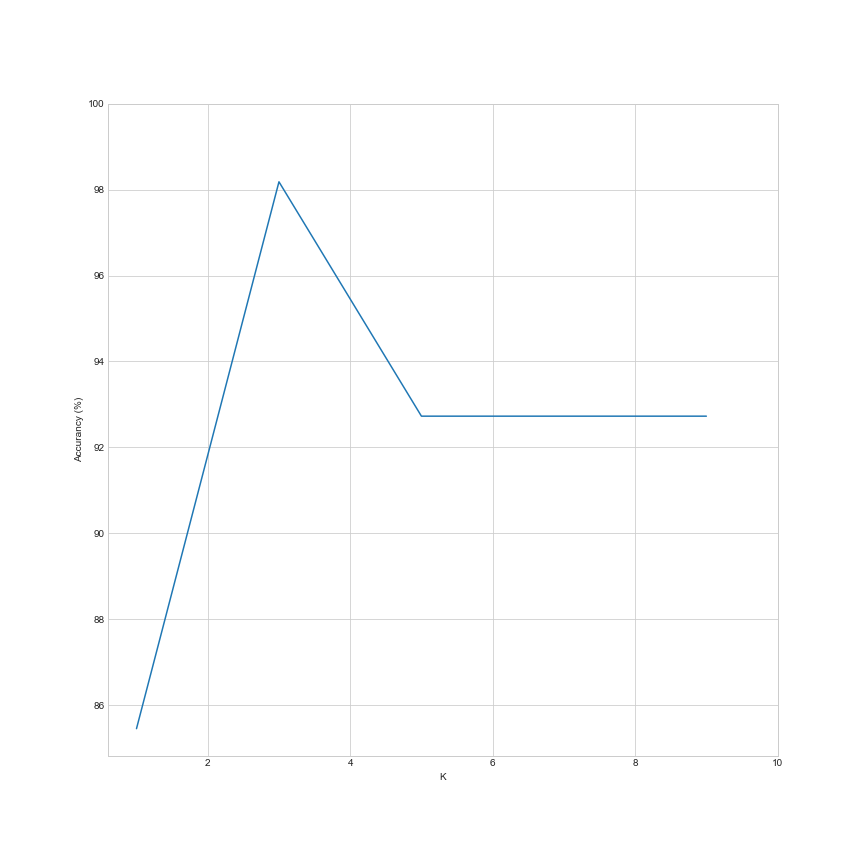

In [60]:
KNN.fit(features_train,labels_train)
scores = []
for i in range(1,10,2):
    predictions = KNN.predict(features_test,i)
    scores.append(KNN.score(predictions, labels_test))

plt.figure(figsize=(12,12))
plt.plot([1,3,5,7,9],scores)
plt.xlim(None,10)
plt.ylim(None,100)

plt.xlabel('K')
plt.ylabel('Accurancy (%)')
plt.show()

## Trainning without outliers and classifying the outliers

In [38]:
outs_features = [i[:-1] for i in outs]
outs_labels = [i[-1] for i in outs]

<IPython.core.display.Javascript object>


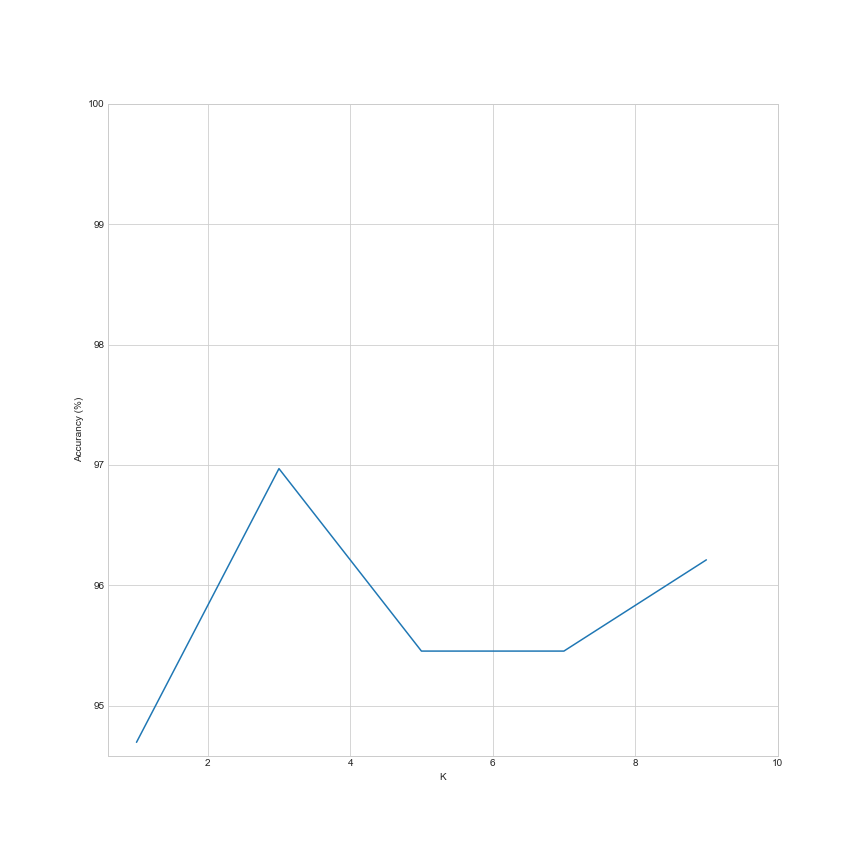

In [39]:
KNN.fit(features_train,labels_train)
scores = []
for i in range(1,10,2):
    predictions = KNN.predict(outs_features,i)
    scores.append(KNN.score(predictions, outs_labels))

plt.figure(figsize=(12,12))
plt.plot([1,3,5,7,9],scores)
plt.xlim(None,10)
plt.ylim(None,100)

plt.xlabel('K')
plt.ylabel('Accurancy (%)')
plt.show()

## Proving the dimensional problem

<IPython.core.display.Javascript object>


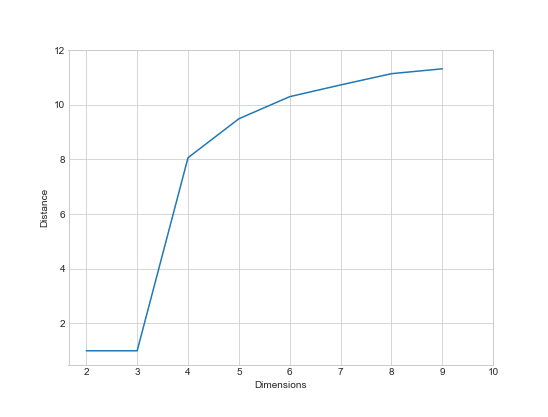

In [25]:
distances = []
for i in range(8):
    columns = df.columns[i:]
    features = df[columns]
    features_train = features.loc[0].tolist()
    features_test = features.loc[1].tolist()

    labels_train = features_train[-1]
    labels_test = features_test[-1]
    
    features_train = features_train[:-1]
    features_test = features_test[:-1]
    
    distances.append(KNN.dist(features_train, features_test))

plt.plot(list(range(2,10))[::-1],distances)
plt.xlim(None,10)
plt.ylim(None,12)

plt.xlabel('Dimensions')
plt.ylabel('Distance')

The plot above demonstrate the dimensional curse, we can observe with 6 dimensions the distance between points is greatest the max value of each atribute, so on.